## Primo Esercizio Machine Learning


**Obiettivo**: creare un algoritmo capace di imparare a classificare le diverse specie di pinguini a partire dallle caratteristiche di un pinguino, usando il machine learning supervisionato.

La variabile **target** è la specie presente nella colonna `species`. Questa variabile è di tipo qualitativo, quindi l'algoritmo è un **classificatore** 

## Import delle librerie da utilizzare

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Scelta dei dati da utilizzare

In [2]:
data = pd.read_csv('./penguins_size.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Scelta del target e delle features che andremo ad utilizzare

In [3]:
target = ["species"]
# caratteristiche da usare per il riconoscimento
features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]

## Preparazione e pulizia dati

In questa fase dobbiamo anche trasformare le features qualitative in feature numeriche, in questo caso non è neccessario

In [4]:
# dropna lo faccio qua per non perdere troppi dati
# se lo facessi prima potrei perdere dati perchè le colonne che hanno un valore null sono irrilevanti
useful_data = data[features + target].dropna() 
useful_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie


## Creazione grafico

In [5]:
np.unique(useful_data[target])

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
species_color = {'Adelie': "red", 'Chinstrap': "yellow", 'Gentoo': "blue"}

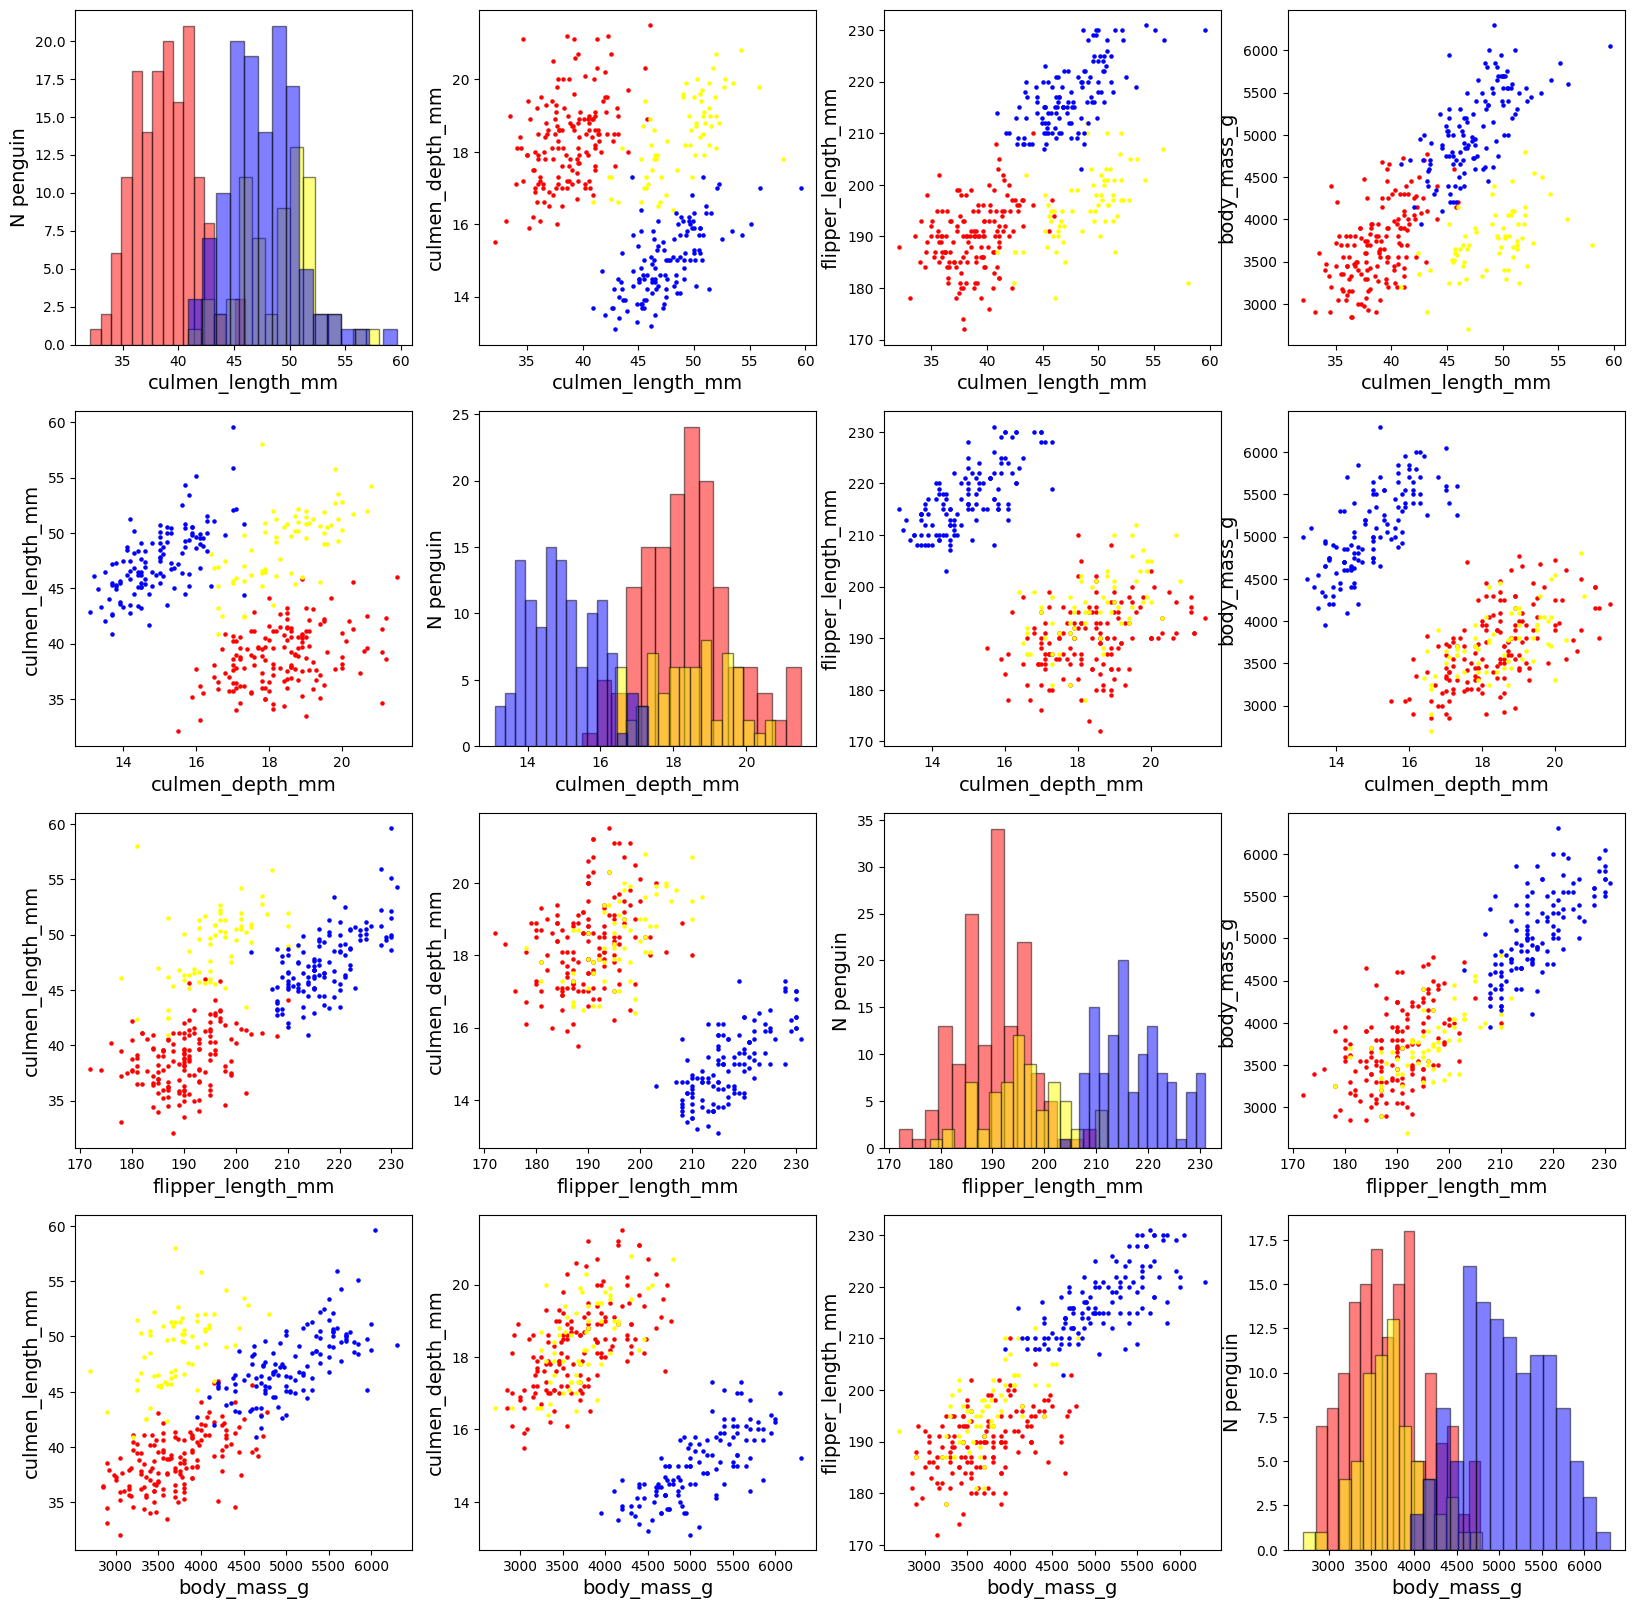

In [7]:
fig, axs = plt.subplots(4,4,figsize = (20, 20))

for i, f_i in enumerate(features):
    for j, f_j in enumerate(features):
        if i != j:
            for sp in species_color:
                filt = useful_data["species"] == sp # seleziono la specie
                axs[i,j].scatter(useful_data[filt][f_i], useful_data[filt][f_j], s = 5, c = species_color[sp])
                
            axs[i,j].set_xlabel(f_i, fontsize = 14)
            axs[i,j].set_ylabel(f_j, fontsize = 14)
        else:
            for sp in species_color:
                filt = useful_data["species"] == sp # seleziono la specie
                axs[i,j].hist(useful_data[filt][f_i], bins = 15,alpha = 0.5, edgecolor = "k", color = species_color[sp])
                
            axs[i,j].set_xlabel(f_i, fontsize = 14)
            axs[i,j].set_ylabel("N penguin", fontsize = 14)
        
plt.show()        

## Suddivisone dei dati in training set e test set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X= useful_data[features] # dati in input: featuere, X maiuscola perchè i dati in input sono più di uno
y = useful_data[target] # variabile target

In [10]:
# splitto i dati in training e test set, random_state è il seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 123)

In [11]:
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
94,36.2,17.3,187.0,3300.0
313,49.5,16.1,224.0,5650.0
298,45.2,13.8,215.0,4750.0
321,55.9,17.0,228.0,5600.0
212,51.9,19.5,206.0,3950.0
...,...,...,...,...
84,37.3,17.8,191.0,3350.0
18,34.4,18.4,184.0,3325.0
231,49.0,16.1,216.0,5550.0
99,43.2,18.5,192.0,4100.0


La rete neurale potrebbe concentrarsi sui valori più grandi, quindi bisognerebbe fare la procedura di **normalizzazione**, 

anche detta di **standardizzazione**, delle feature, per riportare tutte le feature in un range comune, per esempio $\in[-1,1]$.

La faremo successivamente...

## Scelta del modello

In [12]:
from sklearn.neural_network import MLPClassifier

In [13]:
# hidden layers size indica il numero di neuroni nei layer nascosti, il layer di input è fatto dal numero di features
model = MLPClassifier(hidden_layer_sizes=(15,15,6), max_iter=2000, random_state= 987)

## Addestramento della rete neurale

In [14]:
model.fit(X_train, y_train.to_numpy().ravel())

MLPClassifier(hidden_layer_sizes=(15, 15, 6), max_iter=2000, random_state=987)

In [15]:
accuratezza  = model.score(X_test, y_test) * 100
print(f"Accuratezza: {accuratezza:.2f}%")
# l'accuratezza è bassa perchè non abbiamo fatto la normalizzazione

Accuratezza: 41.25%


## La procedura di normalizzazione (o standardizzazione)

Serve per trasformare le feature di un dataset in modo che ogni feature abbia:

- valore medio pari a 0
- deviazione standard pari a 1

Realizziamo questa trasformazione con *numpy* su una singola feture fittizia, poi utilizzeremo una classe apposita di sklearn

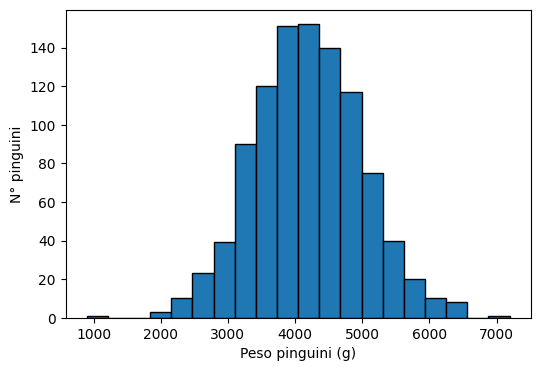

In [16]:
peso = np.random.normal(4200, 800, 1000)

fig, ax = plt.subplots(figsize=(6,4))
ax.hist(peso, bins = 20, edgecolor = "k")
ax.set_xlabel("Peso pinguini (g)")
ax.set_ylabel("N° pinguini")
plt.show()

In [17]:
peso_m0 = peso -np.mean(peso)

In [18]:
np.mean(peso_m0)

6.311893230304122e-13

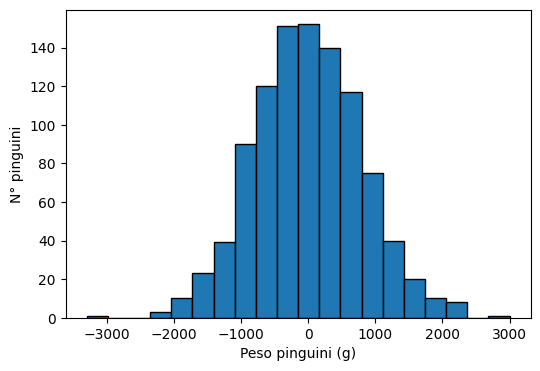

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(peso_m0, bins = 20, edgecolor = "k")
ax.set_xlabel("Peso pinguini (g)")
ax.set_ylabel("N° pinguini")
plt.show()

In [20]:
peso_m0_s1 = peso_m0 / np.std(peso_m0)
print(f"Il valor medio dei dati trasformati è {np.mean(peso_m0_s1):.4f}\
 e la deviazione standard dei dati trasforamti è {np.std(peso_m0_s1):.4f}")

Il valor medio dei dati trasformati è 0.0000 e la deviazione standard dei dati trasforamti è 1.0000


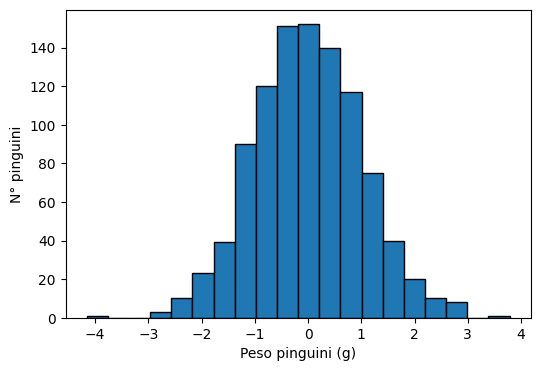

In [21]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(peso_m0_s1, bins = 20, edgecolor = "k")
ax.set_xlabel("Peso pinguini (g)")
ax.set_ylabel("N° pinguini")
plt.show()

Facciamo la normalizzazione con una classe apposita di *sklearn*.

In [22]:
from sklearn.preprocessing import StandardScaler

Usiamo `StandardScaler` sul nostro array fittizio, ma può essere usato anche su un intero `DataFrame`.

In [23]:
scaler = StandardScaler()
peso_normalizzato = scaler.fit_transform(peso.reshape(-1,1)) # quando usiamo un DatFrame reshape non serve

In [24]:
print(f"Il valor medio dei dati trasformati è {np.mean(peso_normalizzato):.4f}\
 e la deviazione standard dei dati trasforamti è {np.std(peso_normalizzato):.4f}")

Il valor medio dei dati trasformati è 0.0000 e la deviazione standard dei dati trasforamti è 1.0000


In [25]:
scaler.transform([[3600]])

array([[-0.74913115]])

In [26]:
scaler.inverse_transform([[0.5]])

array([[4590.25453487]])

## I LabelEncoder (si usano come la normalizzazione, ma non sono legati alla normalizzazione)

Si tratta di una trasformazione dei dati che consente di tarsformare dei dati categorici con categoria di tipo stringa in dati categorici con categorie numeriche.

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
specie = np.random.choice(["Adelie", "Chinstrap", "Gentoo"], 100)
specie

array(['Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 

In [29]:
specie_Encoder = LabelEncoder()
specie_numerica = specie_Encoder.fit_transform(specie)
specie_numerica

array([2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2,
       2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 2, 2,
       1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 2,
       1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0,
       1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2], dtype=int64)

In [30]:
specie_Encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype='<U9')

In [31]:
specie_Encoder.transform(["Adelie"])

array([0])

In [32]:
specie_Encoder.inverse_transform([2])

array(['Gentoo'], dtype='<U9')

## Rifacciamo parte della procedura di addestramento partendo però dalla normalizzazione delle feature che prima non abbiamo eseguito

In [33]:
X = useful_data[features].to_numpy() # toglie il warning nei risultati
y = useful_data[target]

Normalizziamo `X`

In [34]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [35]:
feature_scaler = StandardScaler()
X_norm = feature_scaler.fit_transform(X) # qui stiamo operando su un DataFrame
X_norm

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

In [36]:
target_encoder = LabelEncoder()
y_enc = target_encoder.fit_transform(y.to_numpy().reshape(-1, 1).ravel())
y_enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## Suddivisone dei dati in training set e test set

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_enc, test_size = 0.3, random_state = 123)

In [38]:
model = MLPClassifier(hidden_layer_sizes=(20,20,7), max_iter=2000, random_state= 987)

In [39]:
#creo la rete neurale
iters = np.arange(10, 1000, 50)
train_acc = []
test_acc = []
for i in iters:
    model = MLPClassifier(hidden_layer_sizes=(10,10,6), max_iter=i, random_state=987, solver="adam") 
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

c:\Users\Paolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Paolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Paolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Paolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimi

[]

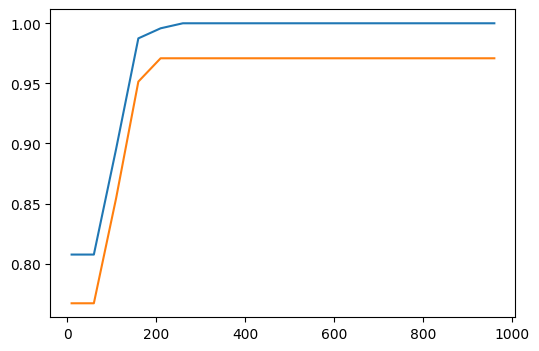

In [40]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(iters, train_acc, label = "Training")
ax.plot(iters, test_acc, label = "Test")
plt.plot()

In [41]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 6), max_iter=960, random_state=987)

In [42]:
# accuratezza sui dati di training
accuratezza  = model.score(X_train, y_train) * 100
print(f"Accuratezza: {accuratezza:.2f}%")

Accuratezza: 100.00%


In [43]:
# accuratezza sui dati di test
accuratezza  = model.score(X_test, y_test) * 100
print(f"Accuratezza: {accuratezza:.2f}%")

Accuratezza: 97.09%


In [44]:
pinguino_test = [[38, 15.6, 205.0, 3780.0]]
specie_num = model.predict(feature_scaler.transform(pinguino_test))
print(f"Il pinguino è un {target_encoder.inverse_transform(specie_num)[0]}")

Il pinguino è un Adelie


Per mettere un modello su una webapp si importa in un file e poi si usa ed è già addestrato

In [45]:
import joblib
joblib.dump(model, "./penguin_model.joblib")
joblib.dump(feature_scaler, "./feature_scaler.joblib")
joblib.dump(target_encoder, "./feature_encoder.joblib")

['./feature_encoder.joblib']